In [1]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [2]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [3]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    #image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(gradient,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 20))
    closed1 = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 1))
    opened1 = cv2.morphologyEx(closed1, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
    dilated = cv2.dilate(opened1, kernel, iterations=3)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 399.  256.]
 [1289.  252.]
 [ 404. 1135.]
 [1294. 1130.]]
Wall time: 330 ms


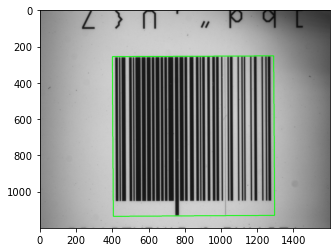

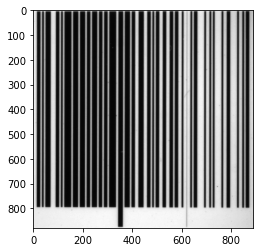

In [4]:
%%time
bound_box(f'../images/{images_paths[0]}')

[[ 348.  282.]
 [1241.  282.]
 [ 348. 1089.]
 [1241. 1089.]]
Wall time: 262 ms


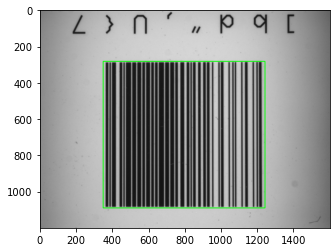

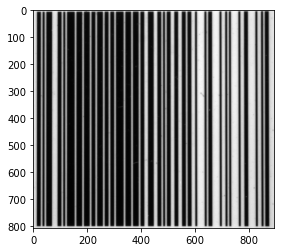

In [5]:
%%time
bound_box(f'../images/{images_paths[1]}')

[[ 198.  239.]
 [1037.  232.]
 [ 202.  770.]
 [1041.  764.]]
Wall time: 207 ms


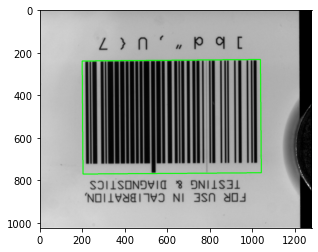

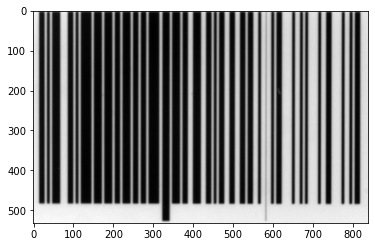

In [6]:
%%time
bound_box(f'../images/{images_paths[2]}')

[[129. 254.]
 [967. 254.]
 [129. 745.]
 [967. 745.]]
Wall time: 215 ms


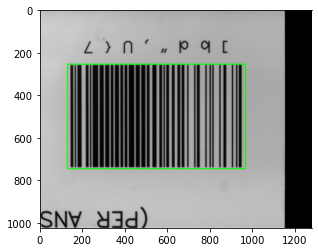

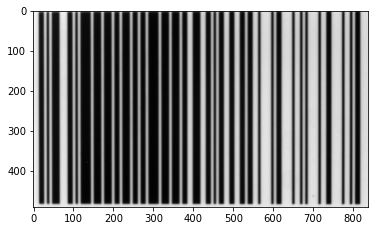

In [7]:
%%time
bound_box(f'../images/{images_paths[3]}')

[[334. 167.]
 [898. 167.]
 [334. 735.]
 [898. 735.]]
Wall time: 209 ms


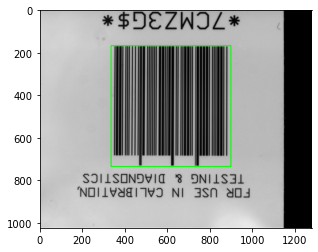

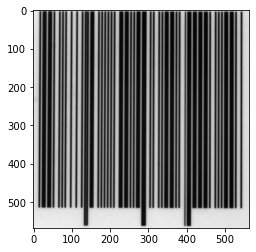

In [8]:
%%time
bound_box(f'../images/{images_paths[4]}')

[[342. 246.]
 [909. 246.]
 [342. 769.]
 [909. 769.]]


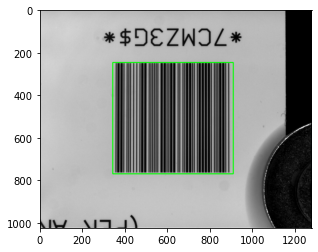

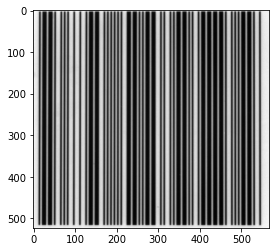

In [9]:
bound_box(f'../images/{images_paths[5]}')

[[ 163.  283.]
 [1097.  281.]
 [ 164.  852.]
 [1098.  850.]]


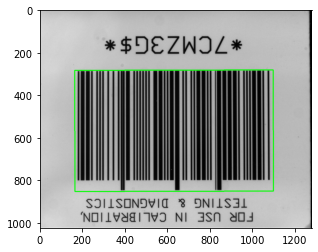

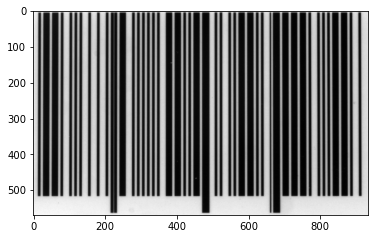

In [10]:
bound_box(f'../images/{images_paths[6]}')

[[ 151.  270.]
 [1089.  272.]
 [ 150.  793.]
 [1088.  794.]]


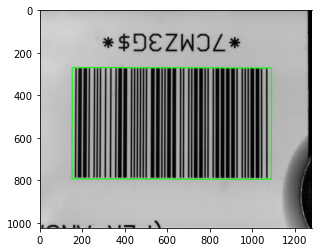

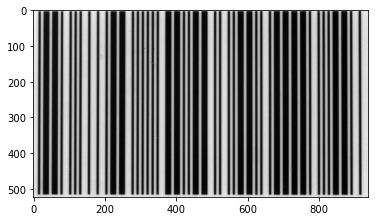

In [11]:
bound_box(f'../images/{images_paths[7]}')

[[ 151.  270.]
 [1089.  272.]
 [ 150.  793.]
 [1088.  794.]]


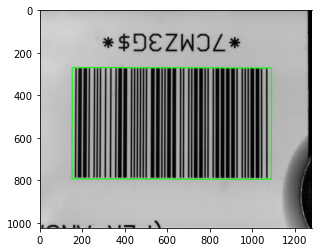

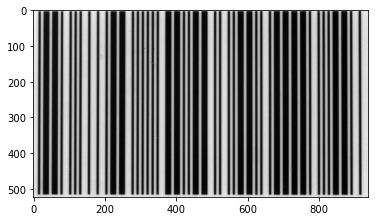

In [12]:
bound_box(f'../images/{images_paths[7]}')

[[330. 333.]
 [970. 337.]
 [327. 783.]
 [967. 787.]]


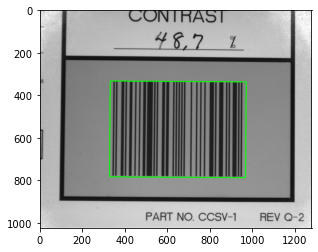

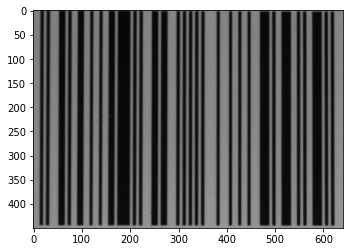

In [13]:
bound_box(f'../images/{images_paths[8]}')

[[342. 252.]
 [977. 260.]
 [336. 724.]
 [971. 732.]]


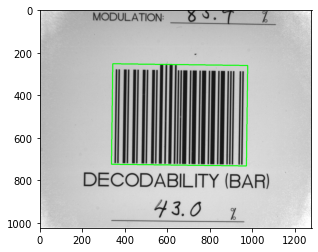

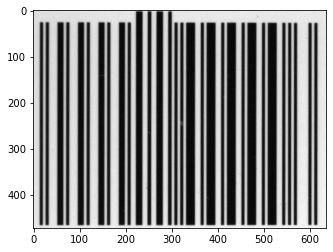

In [14]:
bound_box(f'../images/{images_paths[9]}')

In [15]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [16]:
#bound_box(f'../images/{images_paths[10]}')

[[259. 281.]
 [952. 278.]
 [260. 761.]
 [953. 759.]]


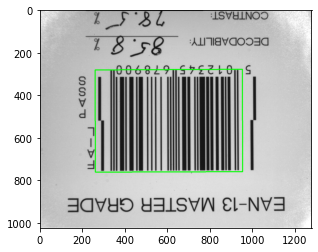

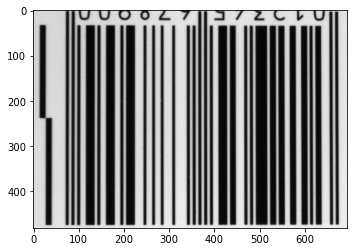

In [17]:
bound_box(f'../images/{images_paths[11]}')

In [18]:
#bound_box(f'../images/{images_paths[12]}')

[[  98.  116.]
 [1292.  118.]
 [  97.  314.]
 [1291.  316.]]


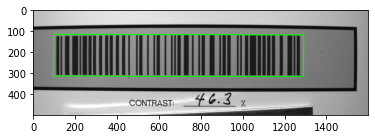

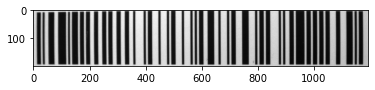

In [19]:
bound_box(f'../images/{images_paths[13]}')

[[ 161.  141.]
 [1349.  141.]
 [ 161.  341.]
 [1349.  341.]]


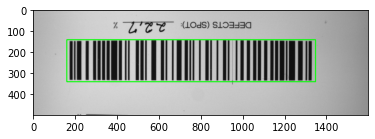

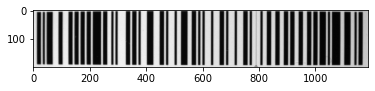

In [20]:
bound_box(f'../images/{images_paths[14]}')

[[ 174.  165.]
 [1381.  150.]
 [ 177.  366.]
 [1384.  352.]]


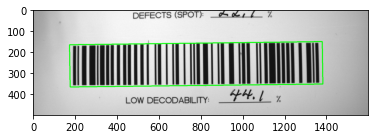

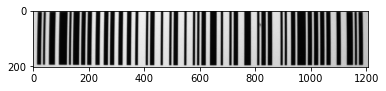

In [21]:
bound_box(f'../images/{images_paths[15]}')

[[ 152.  137.]
 [1447.  138.]
 [ 152.  336.]
 [1447.  336.]]


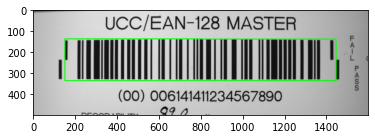

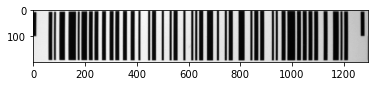

In [22]:
bound_box(f'../images/{images_paths[16]}')

[[ 195.  143.]
 [1349.  121.]
 [ 200.  389.]
 [1353.  367.]]


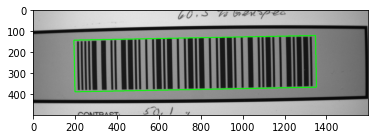

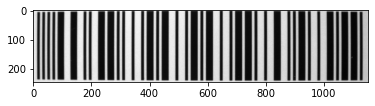

In [23]:
bound_box(f'../images/{images_paths[17]}')

[[ 197.  126.]
 [1355.  116.]
 [ 199.  373.]
 [1357.  363.]]


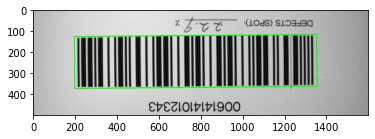

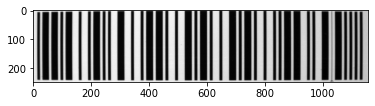

In [24]:
bound_box(f'../images/{images_paths[18]}')

[[ 230.   57.]
 [1384.   57.]
 [ 230.  303.]
 [1384.  303.]]


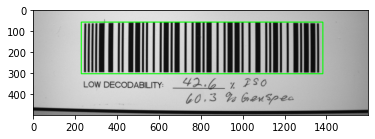

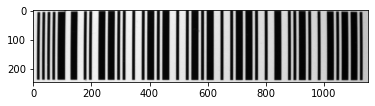

In [27]:
bound_box(f'../images/{images_paths[19]}')

[[ 247.  140.]
 [1405.  126.]
 [ 250.  387.]
 [1408.  373.]]


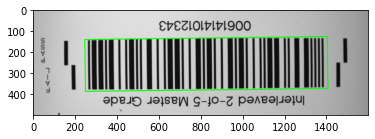

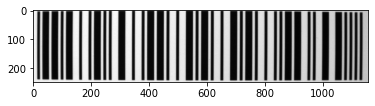

In [28]:
bound_box(f'../images/{images_paths[20]}')

In [29]:
print(f'../images/{images_paths[21]}')

images/TestChart.xls


In [30]:
#bound_box(f'../images/{images_paths[21]}')

[[177. 210.]
 [886. 205.]
 [181. 647.]
 [889. 641.]]


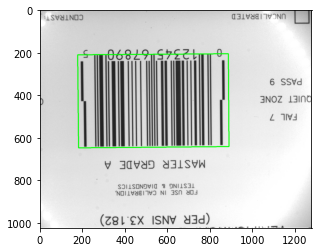

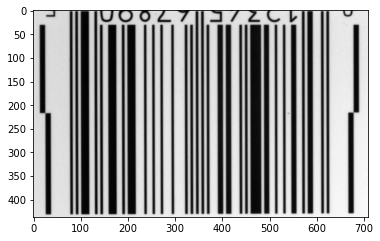

In [31]:
bound_box(f'../images/{images_paths[22]}')

[[177. 210.]
 [886. 205.]
 [181. 647.]
 [889. 641.]]


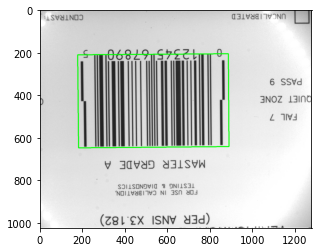

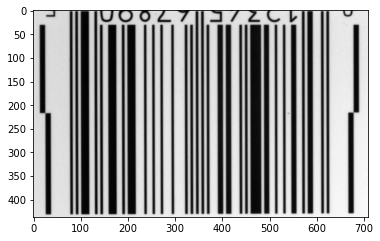

In [32]:
bound_box(f'../images/{images_paths[22]}')

[[313. 304.]
 [895. 310.]
 [309. 740.]
 [890. 746.]]


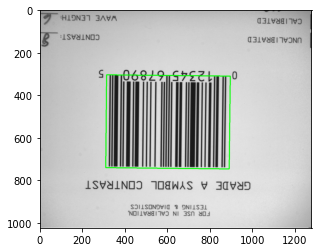

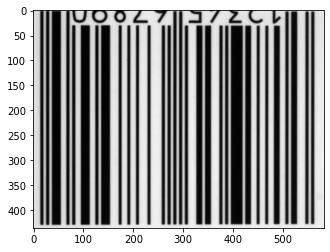

In [33]:
bound_box(f'../images/{images_paths[23]}')

[[347. 299.]
 [926. 310.]
 [339. 735.]
 [918. 745.]]


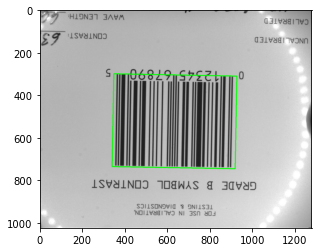

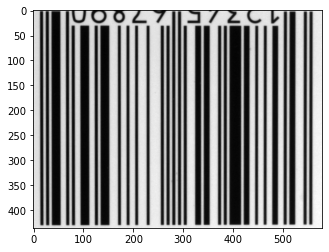

In [34]:
bound_box(f'../images/{images_paths[24]}')

[[355. 303.]
 [933. 306.]
 [353. 737.]
 [932. 739.]]


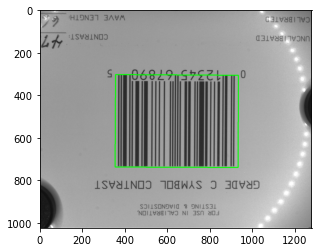

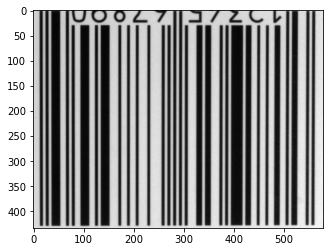

In [35]:
bound_box(f'../images/{images_paths[25]}')

[[295. 287.]
 [872. 308.]
 [279. 713.]
 [856. 734.]]


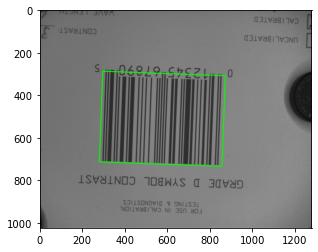

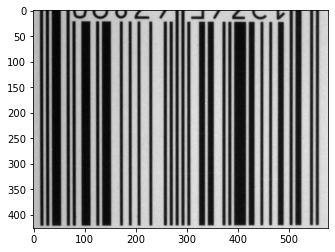

In [36]:
bound_box(f'../images/{images_paths[26]}')

[[332. 291.]
 [908. 300.]
 [324. 723.]
 [901. 733.]]


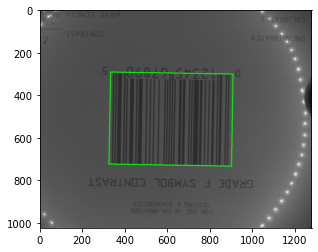

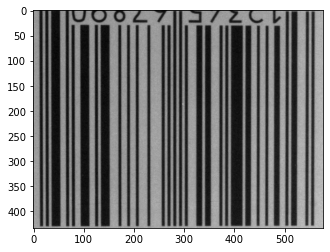

In [39]:
bound_box(f'../images/{images_paths[27]}')

[[325. 293.]
 [906. 301.]
 [319. 731.]
 [900. 738.]]


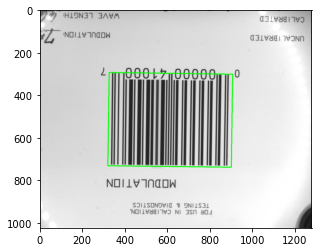

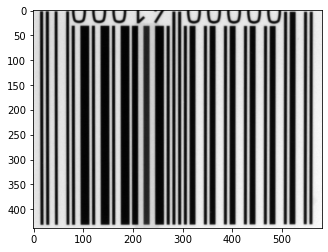

In [40]:
bound_box(f'../images/{images_paths[28]}')

[[324. 299.]
 [906. 309.]
 [317. 735.]
 [898. 745.]]


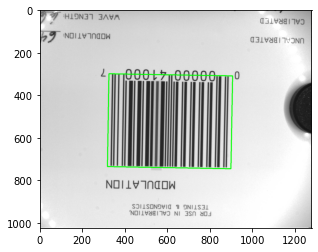

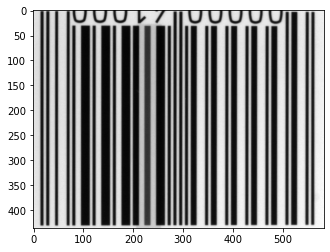

In [41]:
bound_box(f'../images/{images_paths[29]}')

[[322. 309.]
 [903. 321.]
 [313. 746.]
 [894. 757.]]


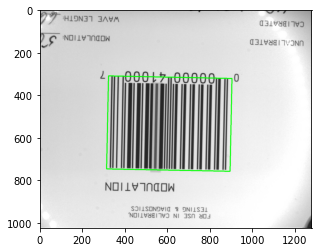

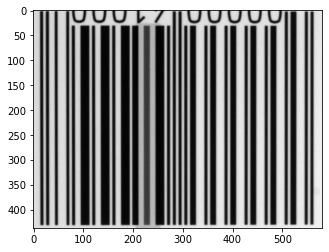

In [42]:
bound_box(f'../images/{images_paths[30]}')

[[330. 298.]
 [909. 315.]
 [317. 734.]
 [897. 751.]]


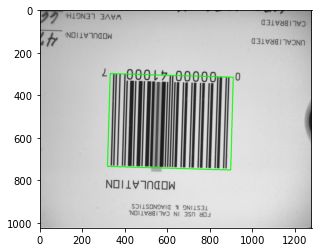

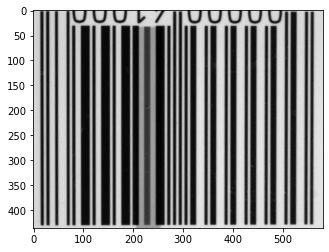

In [43]:
bound_box(f'../images/{images_paths[31]}')

[[331. 289.]
 [911. 289.]
 [331. 725.]
 [911. 725.]]


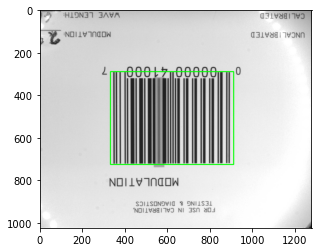

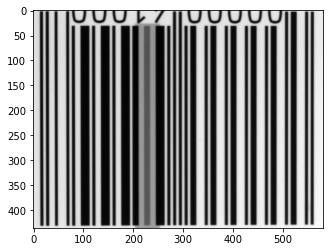

In [44]:
bound_box(f'../images/{images_paths[32]}')

[[343. 297.]
 [923. 302.]
 [339. 753.]
 [919. 759.]]


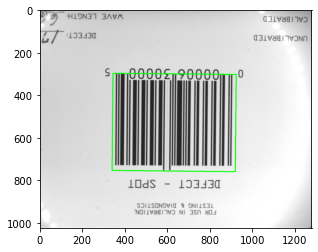

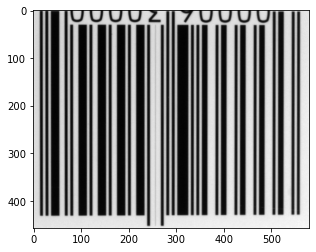

In [45]:
bound_box(f'../images/{images_paths[34]}')

[[342. 287.]
 [923. 295.]
 [336. 743.]
 [916. 752.]]


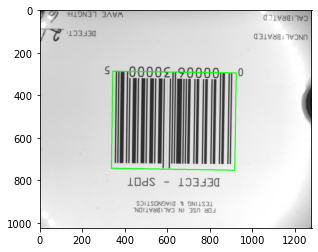

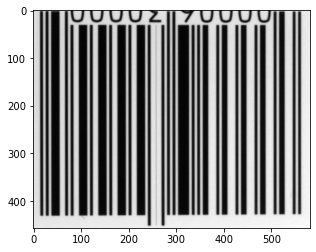

In [46]:
bound_box(f'../images/{images_paths[35]}')

[[330. 292.]
 [910. 292.]
 [330. 748.]
 [910. 748.]]


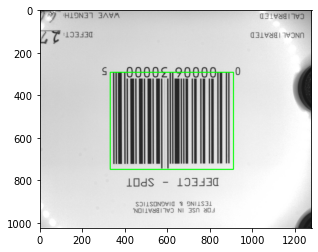

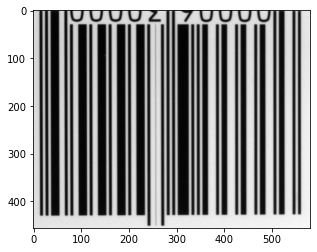

In [47]:
bound_box(f'../images/{images_paths[36]}')

[[317. 297.]
 [896. 298.]
 [317. 754.]
 [896. 754.]]


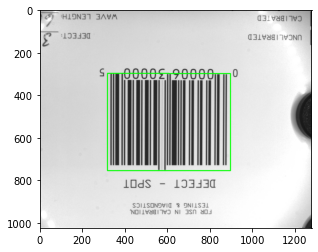

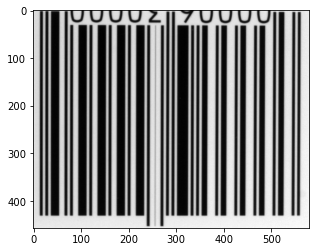

In [48]:
bound_box(f'../images/{images_paths[37]}')

[[329. 298.]
 [910. 300.]
 [328. 755.]
 [909. 756.]]


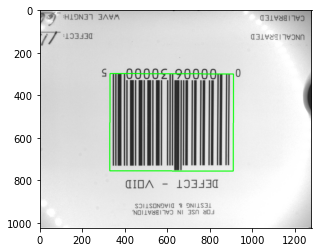

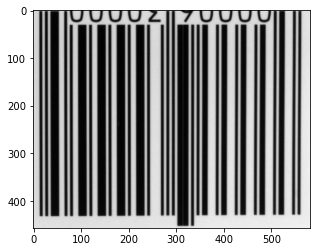

In [49]:
bound_box(f'../images/{images_paths[38]}')

[[333. 291.]
 [914. 297.]
 [328. 747.]
 [908. 754.]]


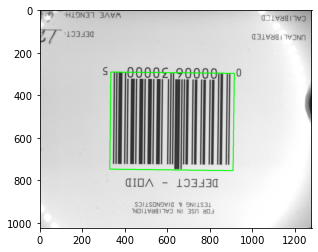

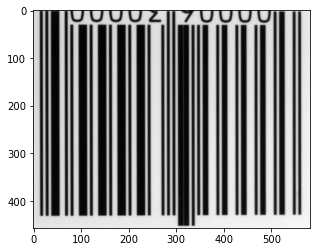

In [50]:
bound_box(f'../images/{images_paths[39]}')

[[297. 300.]
 [878. 303.]
 [295. 758.]
 [875. 761.]]


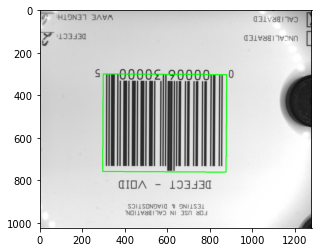

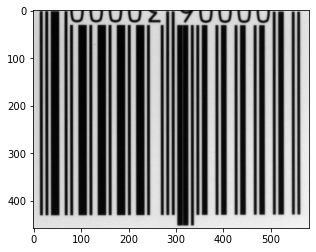

In [51]:
bound_box(f'../images/{images_paths[40]}')

[[287. 294.]
 [867. 291.]
 [289. 750.]
 [869. 747.]]


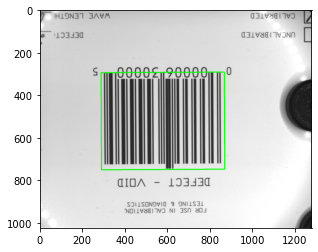

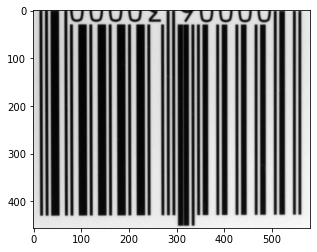

In [52]:
bound_box(f'../images/{images_paths[41]}')

[[285. 291.]
 [865. 291.]
 [285. 748.]
 [865. 748.]]


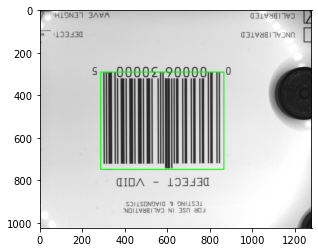

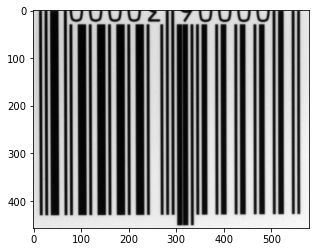

In [53]:
bound_box(f'../images/{images_paths[42]}')

[[279. 285.]
 [860. 285.]
 [279. 721.]
 [860. 721.]]


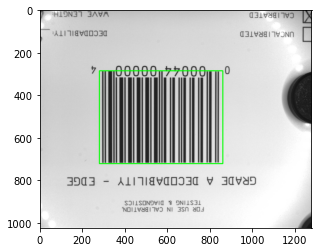

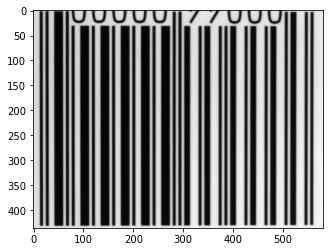

In [54]:
bound_box(f'../images/{images_paths[43]}')

[[279. 285.]
 [860. 285.]
 [279. 721.]
 [860. 721.]]


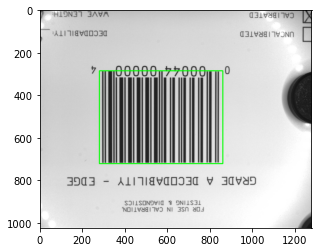

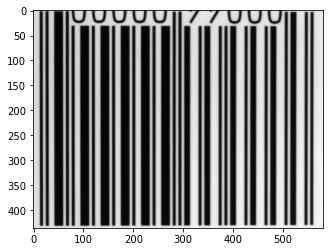

In [55]:
bound_box(f'../images/{images_paths[43]}')

[[289. 291.]
 [870. 295.]
 [286. 729.]
 [867. 733.]]


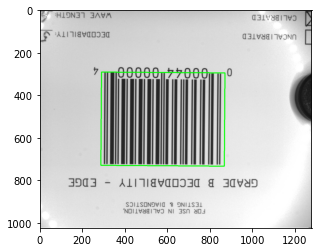

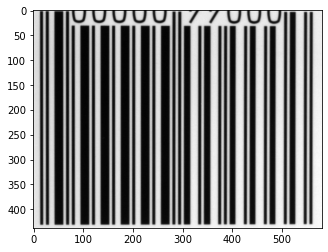

In [56]:
bound_box(f'../images/{images_paths[44]}')

[[278. 303.]
 [859. 306.]
 [275. 740.]
 [857. 743.]]


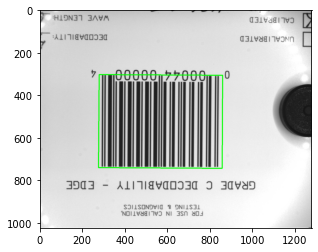

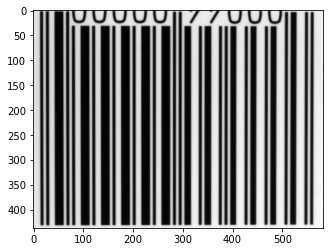

In [57]:
bound_box(f'../images/{images_paths[45]}')

[[262. 292.]
 [843. 301.]
 [256. 729.]
 [837. 737.]]


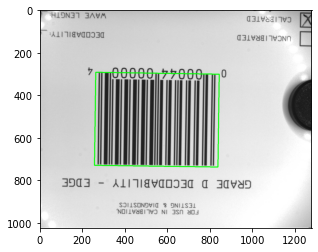

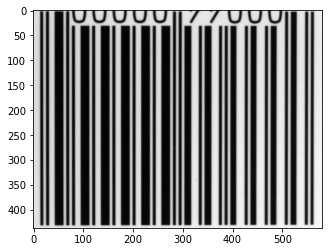

In [58]:
bound_box(f'../images/{images_paths[46]}')

[[256. 301.]
 [838. 306.]
 [252. 737.]
 [834. 742.]]


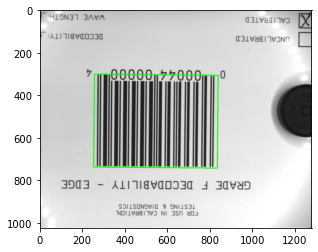

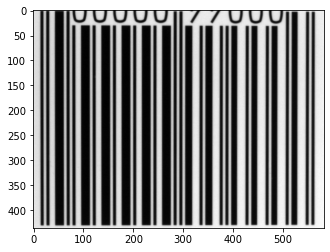

In [59]:
bound_box(f'../images/{images_paths[47]}')

[[250. 299.]
 [832. 308.]
 [244. 736.]
 [826. 744.]]


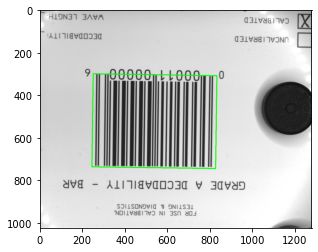

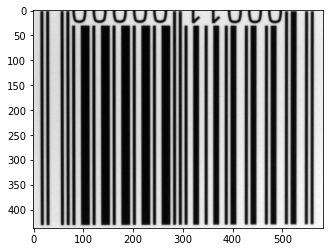

In [60]:
bound_box(f'../images/{images_paths[48]}')

[[254. 299.]
 [836. 306.]
 [249. 737.]
 [831. 744.]]


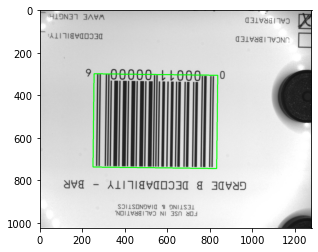

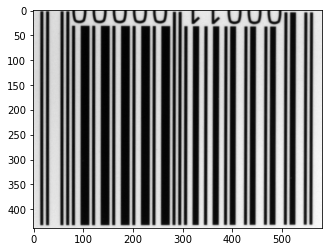

In [61]:
bound_box(f'../images/{images_paths[49]}')

[[279. 277.]
 [861. 286.]
 [272. 714.]
 [854. 722.]]


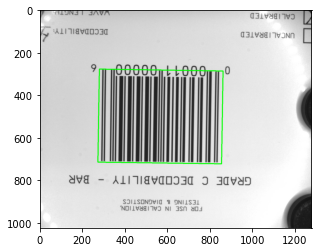

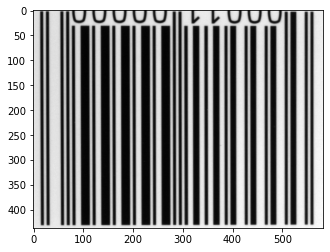

In [62]:
bound_box(f'../images/{images_paths[50]}')

[[281. 287.]
 [863. 295.]
 [275. 725.]
 [857. 733.]]


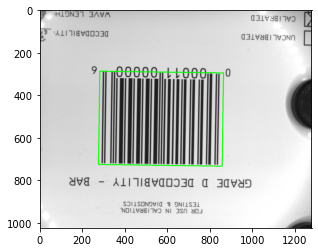

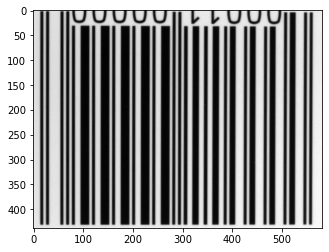

In [63]:
bound_box(f'../images/{images_paths[51]}')

[[294. 291.]
 [875. 291.]
 [294. 727.]
 [875. 727.]]


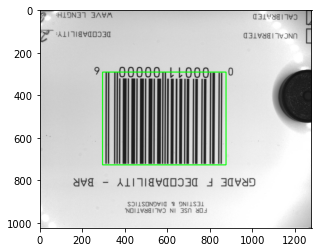

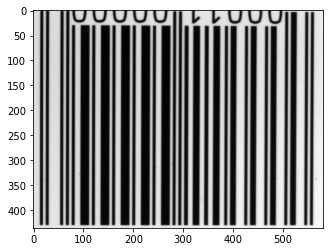

In [64]:
bound_box(f'../images/{images_paths[52]}')

[[ 96.  41.]
 [257.  41.]
 [ 96. 151.]
 [257. 151.]]
Wall time: 98.6 ms


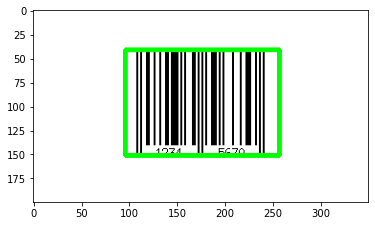

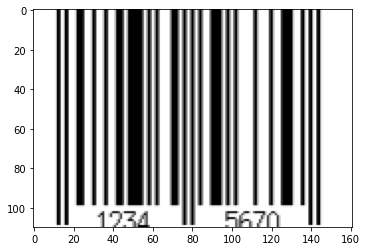

In [65]:
%%time
bound_box('other images/1.png')

[[ 610.  434.]
 [1064.  444.]
 [ 602.  771.]
 [1056.  781.]]
Wall time: 324 ms


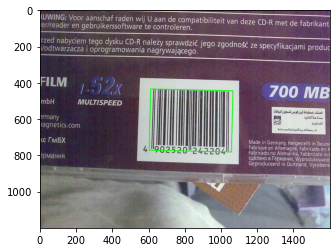

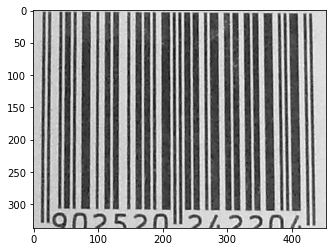

In [69]:
%%time
bound_box('other images/2.jpg')

In [68]:
%%time
bound_box('other images/3.jpg')  # NO ROTATION INVARIANCE

IndexError: list index out of range